In [1]:
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("notebook")
# sns.set_style("darkgrid")
%load_ext lab_black

In [2]:
metadata_paths_dict = {
    x.split("/")[-1].split("__")[0]: x
    for x in sorted(glob.glob("cistopic_objects/*.dimreduc.consensus.cell_data.tsv*"))
}
metadata_paths_dict

{'BIO_ddseq_1.FIXEDCELLS': 'cistopic_objects/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_11topics.dimreduc.consensus.cell_data.tsv',
 'BIO_ddseq_2.FIXEDCELLS': 'cistopic_objects/BIO_ddseq_2.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_14topics.dimreduc.consensus.cell_data.tsv',
 'BIO_ddseq_3.FIXEDCELLS': 'cistopic_objects/BIO_ddseq_3.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_10topics.dimreduc.consensus.cell_data.tsv',
 'BIO_ddseq_4.FIXEDCELLS': 'cistopic_objects/BIO_ddseq_4.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_11topics.dimreduc.consensus.cell_data.tsv',
 'BRO_mtscatac_1.FIXEDCELLS': 'cistopic_objects/BRO_mtscatac_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_11topics.dimreduc.consensus.cell_data.tsv',
 'BRO_mtscatac_2.FIXEDCELLS': 'cistopic_objects/BRO_mtscatac_2.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_17topics.dimreduc.consensus.cell_data.tsv',
 'CNA_10xmultiome_1.FIXEDCELLS': 'cistopic_objects/CNA_10xmultiome_1.FIXEDCELLS__cto.scrublet0-4.fmx

In [4]:
pd.read_csv(
    "cistopic_objects/STA_10xv11_2.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_7topics.dimreduc.consensus.cell_data.tsv",
    sep="\t",
)["consensus_cell_type"].value_counts()

CD14+ monocyte         749
CD4+ T cell            362
Natural killer cell    175
B cell                 148
CD16+ monocyte          83
Name: consensus_cell_type, dtype: int64

In [9]:
df_merged = pd.DataFrame()
for sample, df_path in metadata_paths_dict.items():
    print(sample)
    df = pd.read_csv(df_path, sep="\t")
    if "fmx_sample" in df.columns:
        celltype_counts = pd.DataFrame(
            df.groupby("fmx_sample")["consensus_cell_type"].value_counts()
        )
        celltype_counts.columns = [sample]
        df_merged = pd.concat([df_merged, celltype_counts], axis=1)
        print("\t" + str(celltype_counts))

BIO_ddseq_1.FIXEDCELLS
BIO_ddseq_2.FIXEDCELLS
BIO_ddseq_3.FIXEDCELLS
BIO_ddseq_4.FIXEDCELLS
BRO_mtscatac_1.FIXEDCELLS
	                                BRO_mtscatac_1.FIXEDCELLS
fmx_sample consensus_cell_type                           
sampleA    CD4+ T cell                                515
           CD14+ monocyte                             359
           Cytotoxic T cell                           325
           B cell                                     155
           Natural killer cell                        155
           CD16+ monocyte                             129
           Dendritic cell                              41
sampleB    CD14+ monocyte                             749
           CD4+ T cell                                564
           Natural killer cell                        201
           Cytotoxic T cell                            83
           CD16+ monocyte                              68
           B cell                                      67
           

In [10]:
df_merged

BRO_mtscatac_1.FIXEDCELLS  \
fmx_sample consensus_cell_type                              
sampleA    CD4+ T cell                                515   
           CD14+ monocyte                             359   
           Cytotoxic T cell                           325   
           B cell                                     155   
           Natural killer cell                        155   
           CD16+ monocyte                             129   
           Dendritic cell                              41   
sampleB    CD14+ monocyte                             749   
           CD4+ T cell                                564   
           Natural killer cell                        201   
           Cytotoxic T cell                            83   
           CD16+ monocyte                              68   
           B cell                                      67   
           Dendritic cell                              25   

                                BRO_mtscatac_2.FIXEDCELLS  \
fmx_sample consensus_cell_type                              
sampleA    CD4+ T cell                                498   
           CD14+ monocyte                             305   
           Cytotoxic T cell                           351   
           B cell                                     119   
           Natural killer cell                        154   
           CD16+ monocyte                             110   
           Dendritic cell                              28   
sampleB    CD14+ monocyte                             700   
           CD4+ T cell                                613   
           Natural killer cell                        176   
           Cytotoxic T cell                           105   
           CD16+ monocyte                              60   
           B cell                                      61   
           Dendritic cell                               9   

                                CNA_10xmultiome_1.FIXEDCELLS  \
fmx_sample consensus_cell_type                                 
sampleA    CD4+ T cell                                 463.0   
           CD14+ monocyte                              492.0   
           Cytotoxic T cell                            407.0   
           B cell                                      246.0   
           Natural killer cell                         131.0   
           CD16+ monocyte                                NaN   
           Dendritic cell                               57.0   
sampleB    CD14+ monocyte                              364.0   
           CD4+ T cell                                 535.0   
           Natural killer cell                         197.0   
           Cytotoxic T cell                            228.0   
           CD16+ monocyte                                NaN   
           B cell                                      154.0   
           Dendritic cell                               17.0   

                                CNA_10xmultiome_2.FIXEDCELLS  \
fmx_sample consensus_cell_type                                 
sampleA    CD4+ T cell                                 482.0   
           CD14+ monocyte                              498.0   
           Cytotoxic T cell                            289.0   
           B cell                                      181.0   
           Natural killer cell                          98.0   
           CD16+ monocyte                                NaN   
           Dendritic cell                               61.0   
sampleB    CD14+ monocyte                              322.0   
           CD4+ T cell                                 551.0   
           Natural killer cell                         163.0   
           Cytotoxic T cell                            178.0   
           CD16+ monocyte                                NaN   
           B cell                                      114.0   
           Dendritic cell                               19.0   

                            

In [11]:
df_merged["BRO_mtscatac_1.FIXEDCELLS"]

fmx_sample  consensus_cell_type
sampleA     CD4+ T cell            515
            CD14+ monocyte         359
            Cytotoxic T cell       325
            B cell                 155
            Natural killer cell    155
            CD16+ monocyte         129
            Dendritic cell          41
sampleB     CD14+ monocyte         749
            CD4+ T cell            564
            Natural killer cell    201
            Cytotoxic T cell        83
            CD16+ monocyte          68
            B cell                  67
            Dendritic cell          25
Name: BRO_mtscatac_1.FIXEDCELLS, dtype: int64

# % CD4+ T cells of all T cells should be higher for sampleA than for sampleB

In [45]:
df_samplea = pd.DataFrame(
    df_merged.loc["sampleA", "CD4+ T cell"]
    / df_merged.loc["sampleA", "Cytotoxic T cell"]
)
df_samplea.columns = ["fraction_CD4+"]
df_samplea["sample"] = "Male"

In [46]:
df_sampleb = pd.DataFrame(
    df_merged.loc["sampleB", "CD4+ T cell"]
    / df_merged.loc["sampleB", "Cytotoxic T cell"]
)
df_sampleb.columns = ["fraction_CD4+"]
df_sampleb["sample"] = "Female"

In [47]:
df_scatter = pd.DataFrame()
df_scatter["fraction in male"] = df_samplea["fraction_CD4+"]
df_scatter["fraction in female"] = df_sampleb["fraction_CD4+"]
df_scatter["tech"] = [x.split("_")[1] for x in df_scatter.index]
df_scatter

,fraction in male,fraction in female,tech
BRO_mtscatac_1.FIXEDCELLS,1.584615,6.795181,mtscatac
BRO_mtscatac_2.FIXEDCELLS,1.418803,5.838095,mtscatac
CNA_10xmultiome_1.FIXEDCELLS,1.137592,2.346491,10xmultiome
CNA_10xmultiome_2.FIXEDCELLS,1.667820,3.095506,10xmultiome
CNA_10xv11_1.FIXEDCELLS,1.902913,6.191781,10xv11
CNA_10xv11_2.FIXEDCELLS,1.503906,5.219780,10xv11
CNA_10xv11_3.FIXEDCELLS,1.316883,4.917197,10xv11
CNA_10xv11_4.FIXEDCELLS,2.057692,5.090909,10xv11
CNA_10xv11_5.FIXEDCELLS,1.174757,4.326531,10xv11
CNA_10xv2_1.FIXEDCELLS,1.123711,3.149533,10xv2


In [48]:
df_cd4_merged = pd.concat([df_samplea, df_sampleb])
df_cd4_merged["tech"] = [x.split("_")[1] for x in df_cd4_merged.index]

In [49]:
df_cd4_merged = df_cd4_merged.reset_index()

In [50]:
df_cd4_merged = pd.concat([df_samplea, df_sampleb])
df_cd4_merged["tech"] = [x.split("_")[1] for x in df_cd4_merged.index]

In [51]:
df_cd4_merged = df_cd4_merged.reset_index()

In [52]:
tech_color_palette = {
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xv2": "#1b9e77",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

In [53]:
tech_color_palette_black = {
    "10xv2": "#373737",
    "10xv1": "#373737",
    "10xv11": "#373737",
    "10xmultiome": "#373737",
    "mtscatac": "#373737",
    "ddseq": "#373737",
    "s3atac": "#373737",
    "hydrop": "#373737",
}

In [54]:
tech_order = [
    "10xv2",
    "10xv1",
    "10xv11",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]

In [55]:
tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}

<AxesSubplot: xlabel='fraction in male', ylabel='fraction in female'>

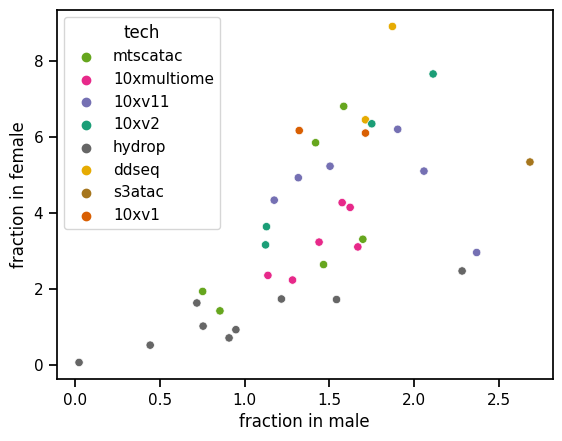

In [56]:
sns.scatterplot(
    data=df_scatter,
    x="fraction in male",
    y="fraction in female",
    hue="tech",
    palette=tech_color_palette,
    alpha=1,
)

# normalize

In [59]:
df_scatter["fraction in female normalized"] = (
    df_scatter["fraction in female"] / df_scatter["fraction in male"]
)

In [60]:
df_scatter.to_csv("fraction_cd4_to_cd8_t_cells.tsv", sep="\t", header=True, index=True)

In [27]:
tech_order_alias = [tech_alias_dict[x] for x in tech_order]

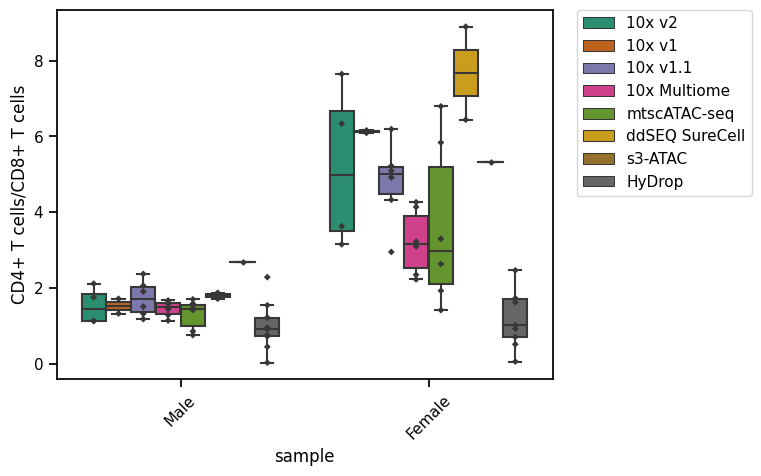

In [28]:
fig, ax = plt.subplots()

sns.boxplot(
    data=df_cd4_merged,
    x="sample",
    y="fraction_CD4+",
    hue="tech",
    dodge=True,
    palette=tech_color_palette,
    hue_order=tech_order,
    fliersize=0,
    ax=ax,
)

handles, labels = ax.get_legend_handles_labels()

sns.stripplot(
    data=df_cd4_merged,
    x="sample",
    y="fraction_CD4+",
    hue="tech",
    dodge=True,
    palette=tech_color_palette_black,
    hue_order=tech_order,
    marker="D",
    jitter=False,
    alpha=1,
    s=3.5,
    ax=ax,
)


plt.xticks(rotation=45)
plt.ylabel("CD4+ T cells/CD8+ T cells")
l = plt.legend(
    handles[0 : len(tech_order)],
    [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
    bbox_to_anchor=(1.05, 1),
    loc=2,
    borderaxespad=0.0,
)

In [29]:
df_cd4_merged

,index,fraction_CD4+,sample,tech
0,BRO_mtscatac_1.FIXEDCELLS,1.584615,Male,mtscatac
1,BRO_mtscatac_2.FIXEDCELLS,1.418803,Male,mtscatac
2,CNA_10xmultiome_1.FIXEDCELLS,1.137592,Male,10xmultiome
3,CNA_10xmultiome_2.FIXEDCELLS,1.667820,Male,10xmultiome
4,CNA_10xv11_1.FIXEDCELLS,1.902913,Male,10xv11
...,...,...,...,...
69,VIB_10xv1_2.FIXEDCELLS,6.092105,Female,10xv1
70,VIB_10xv2_1.FIXEDCELLS,6.336634,Female,10xv2
71,VIB_10xv2_2.FIXEDCELLS,7.647727,Female,10xv2
72,VIB_hydrop_1.FIXEDCELLS,1.011236,Female,hydrop


# Fraction of T cells

/tmp/ipykernel_141070/2297843606.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df_colsums = df_merged.sum(axis="index", level=0)


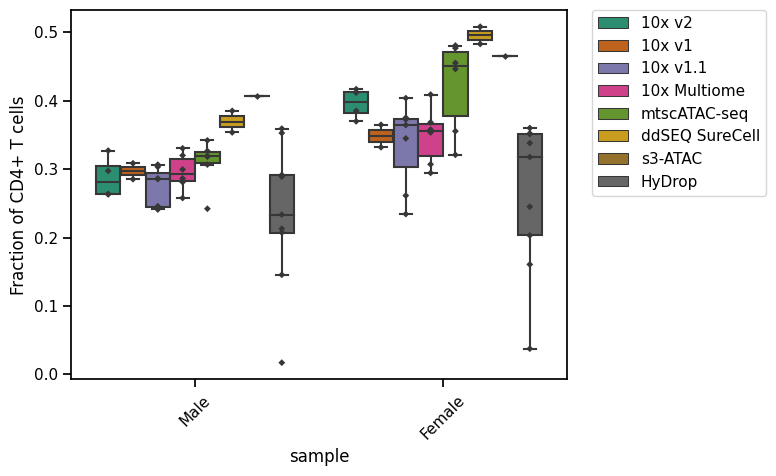

In [43]:
df_colsums = df_merged.sum(axis="index", level=0)

df_samplea = pd.DataFrame(
    df_merged.loc["sampleA", "CD4+ T cell"] / df_colsums.loc["sampleA"]
)
df_samplea.columns = ["Fraction of NK cells"]
df_samplea["sample"] = "Male"

df_sampleb = pd.DataFrame(
    df_merged.loc["sampleB", "CD4+ T cell"] / df_colsums.loc["sampleB"]
)
df_sampleb.columns = ["Fraction of NK cells"]
df_sampleb["sample"] = "Female"

df_nk_merged = pd.concat([df_samplea, df_sampleb])
df_nk_merged["tech"] = [x.split("_")[1] for x in df_nk_merged.index]
df_nk_merged = df_nk_merged.reset_index()

fig, ax = plt.subplots()

sns.boxplot(
    data=df_nk_merged,
    x="sample",
    y="Fraction of NK cells",
    hue="tech",
    dodge=True,
    palette=tech_color_palette,
    hue_order=tech_order,
    fliersize=0,
    ax=ax,
)

handles, labels = ax.get_legend_handles_labels()

sns.stripplot(
    data=df_nk_merged,
    x="sample",
    y="Fraction of NK cells",
    hue="tech",
    dodge=True,
    palette=tech_color_palette_black,
    hue_order=tech_order,
    marker="D",
    jitter=False,
    alpha=1,
    s=3.5,
    ax=ax,
)


plt.xticks(rotation=45)
plt.ylabel("Fraction of CD4+ T cells")
l = plt.legend(
    handles[0 : len(tech_order)],
    [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
    bbox_to_anchor=(1.05, 1),
    loc=2,
    borderaxespad=0.0,
)

/tmp/ipykernel_141070/2287015533.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df_colsums = df_merged.sum(axis="index", level=0)


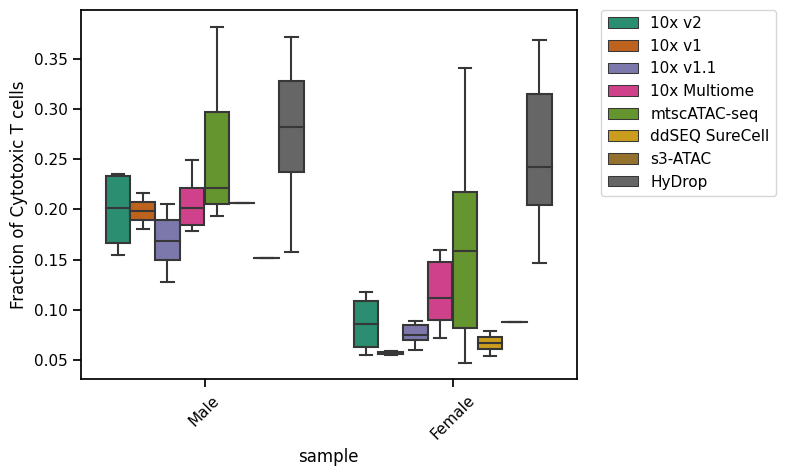

In [38]:
df_colsums = df_merged.sum(axis="index", level=0)

df_samplea = pd.DataFrame(
    df_merged.loc["sampleA", "Cytotoxic T cell"] / df_colsums.loc["sampleA"]
)
df_samplea.columns = ["Fraction of NK cells"]
df_samplea["sample"] = "Male"

df_sampleb = pd.DataFrame(
    df_merged.loc["sampleB", "Cytotoxic T cell"] / df_colsums.loc["sampleB"]
)
df_sampleb.columns = ["Fraction of NK cells"]
df_sampleb["sample"] = "Female"

df_nk_merged = pd.concat([df_samplea, df_sampleb])
df_nk_merged["tech"] = [x.split("_")[1] for x in df_nk_merged.index]
df_nk_merged = df_nk_merged.reset_index()

fig, ax = plt.subplots()

sns.boxplot(
    data=df_nk_merged,
    x="sample",
    y="Fraction of NK cells",
    hue="tech",
    dodge=True,
    palette=tech_color_palette,
    hue_order=tech_order,
    fliersize=0,
    ax=ax,
    showfliers=False,
)

handles, labels = ax.get_legend_handles_labels()

# sns.stripplot(
#     data=df_nk_merged,
#     x="sample",
#     y="Fraction of NK cells",
#     hue="tech",
#     dodge=True,
#     palette=tech_color_palette_black,
#     hue_order=tech_order,
#     marker="D",
#     jitter=False,
#     alpha=1,
#     s=3.5,
#     ax=ax,
#     showfliers=False
# )


plt.xticks(rotation=45)
plt.ylabel("Fraction of Cytotoxic T cells")
l = plt.legend(
    handles[0 : len(tech_order)],
    [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
    bbox_to_anchor=(1.05, 1),
    loc=2,
    borderaxespad=0.0,
)

# NK cell numbers should be higher in females

/tmp/ipykernel_141070/3353564875.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df_colsums = df_merged.sum(axis="index", level=0)


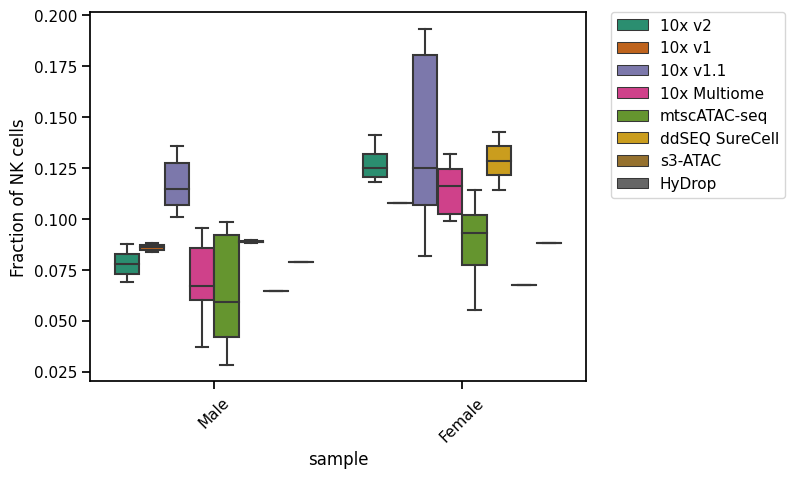

In [39]:
df_colsums = df_merged.sum(axis="index", level=0)

df_samplea = pd.DataFrame(
    df_merged.loc["sampleA", "Natural killer cell"] / df_colsums.loc["sampleA"]
)
df_samplea.columns = ["Fraction of NK cells"]
df_samplea["sample"] = "Male"

df_sampleb = pd.DataFrame(
    df_merged.loc["sampleB", "Natural killer cell"] / df_colsums.loc["sampleB"]
)
df_sampleb.columns = ["Fraction of NK cells"]
df_sampleb["sample"] = "Female"

df_nk_merged = pd.concat([df_samplea, df_sampleb])
df_nk_merged["tech"] = [x.split("_")[1] for x in df_nk_merged.index]
df_nk_merged = df_nk_merged.reset_index()

fig, ax = plt.subplots()

sns.boxplot(
    data=df_nk_merged,
    x="sample",
    y="Fraction of NK cells",
    hue="tech",
    dodge=True,
    palette=tech_color_palette,
    hue_order=tech_order,
    fliersize=0,
    ax=ax,
)

handles, labels = ax.get_legend_handles_labels()

# sns.stripplot(
#     data=df_nk_merged,
#     x="sample",
#     y="Fraction of NK cells",
#     hue="tech",
#     dodge=True,
#     palette=tech_color_palette_black,
#     hue_order=tech_order,
#     marker="D",
#     jitter=False,
#     alpha=1,
#     s=3.5,
#     ax=ax,
# )


plt.xticks(rotation=45)
plt.ylabel("Fraction of NK cells")
l = plt.legend(
    handles[0 : len(tech_order)],
    [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
    bbox_to_anchor=(1.05, 1),
    loc=2,
    borderaxespad=0.0,
)

/tmp/ipykernel_141070/3709309616.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df_colsums = df_merged.sum(axis="index", level=0)


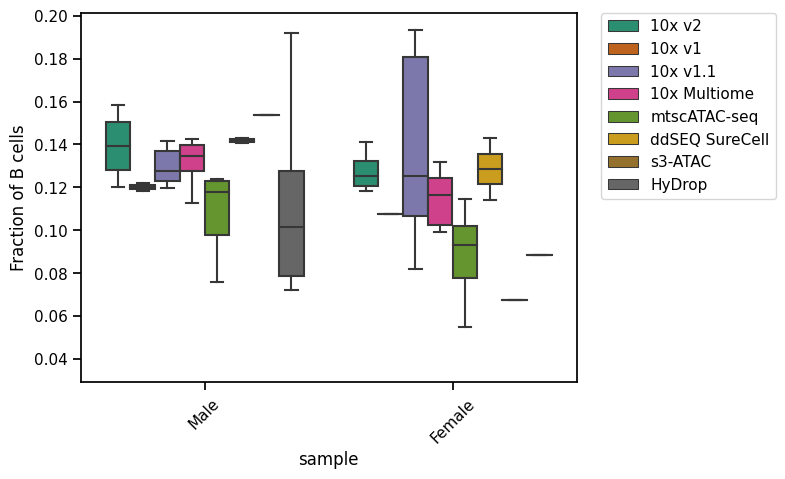

In [40]:
df_colsums = df_merged.sum(axis="index", level=0)

df_samplea = pd.DataFrame(
    df_merged.loc["sampleA", "B cell"] / df_colsums.loc["sampleA"]
)
df_samplea.columns = ["Fraction of B cells"]
df_samplea["sample"] = "Male"

df_sampleb = pd.DataFrame(
    df_merged.loc["sampleB", "Natural killer cell"] / df_colsums.loc["sampleB"]
)
df_sampleb.columns = ["Fraction of B cells"]
df_sampleb["sample"] = "Female"

df_nk_merged = pd.concat([df_samplea, df_sampleb])
df_nk_merged["tech"] = [x.split("_")[1] for x in df_nk_merged.index]
df_nk_merged = df_nk_merged.reset_index()

fig, ax = plt.subplots()

sns.boxplot(
    data=df_nk_merged,
    x="sample",
    y="Fraction of B cells",
    hue="tech",
    dodge=True,
    palette=tech_color_palette,
    hue_order=tech_order,
    fliersize=0,
    ax=ax,
)

handles, labels = ax.get_legend_handles_labels()

# sns.stripplot(
#     data=df_nk_merged,
#     x="sample",
#     y="Fraction of B cells",
#     hue="tech",
#     dodge=True,
#     palette=tech_color_palette_black,
#     hue_order=tech_order,
#     marker="D",
#     jitter=False,
#     alpha=1,
#     s=3.5,
#     ax=ax,
# )


plt.xticks(rotation=45)
plt.ylabel("Fraction of B cells")
l = plt.legend(
    handles[0 : len(tech_order)],
    [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
    bbox_to_anchor=(1.05, 1),
    loc=2,
    borderaxespad=0.0,
)